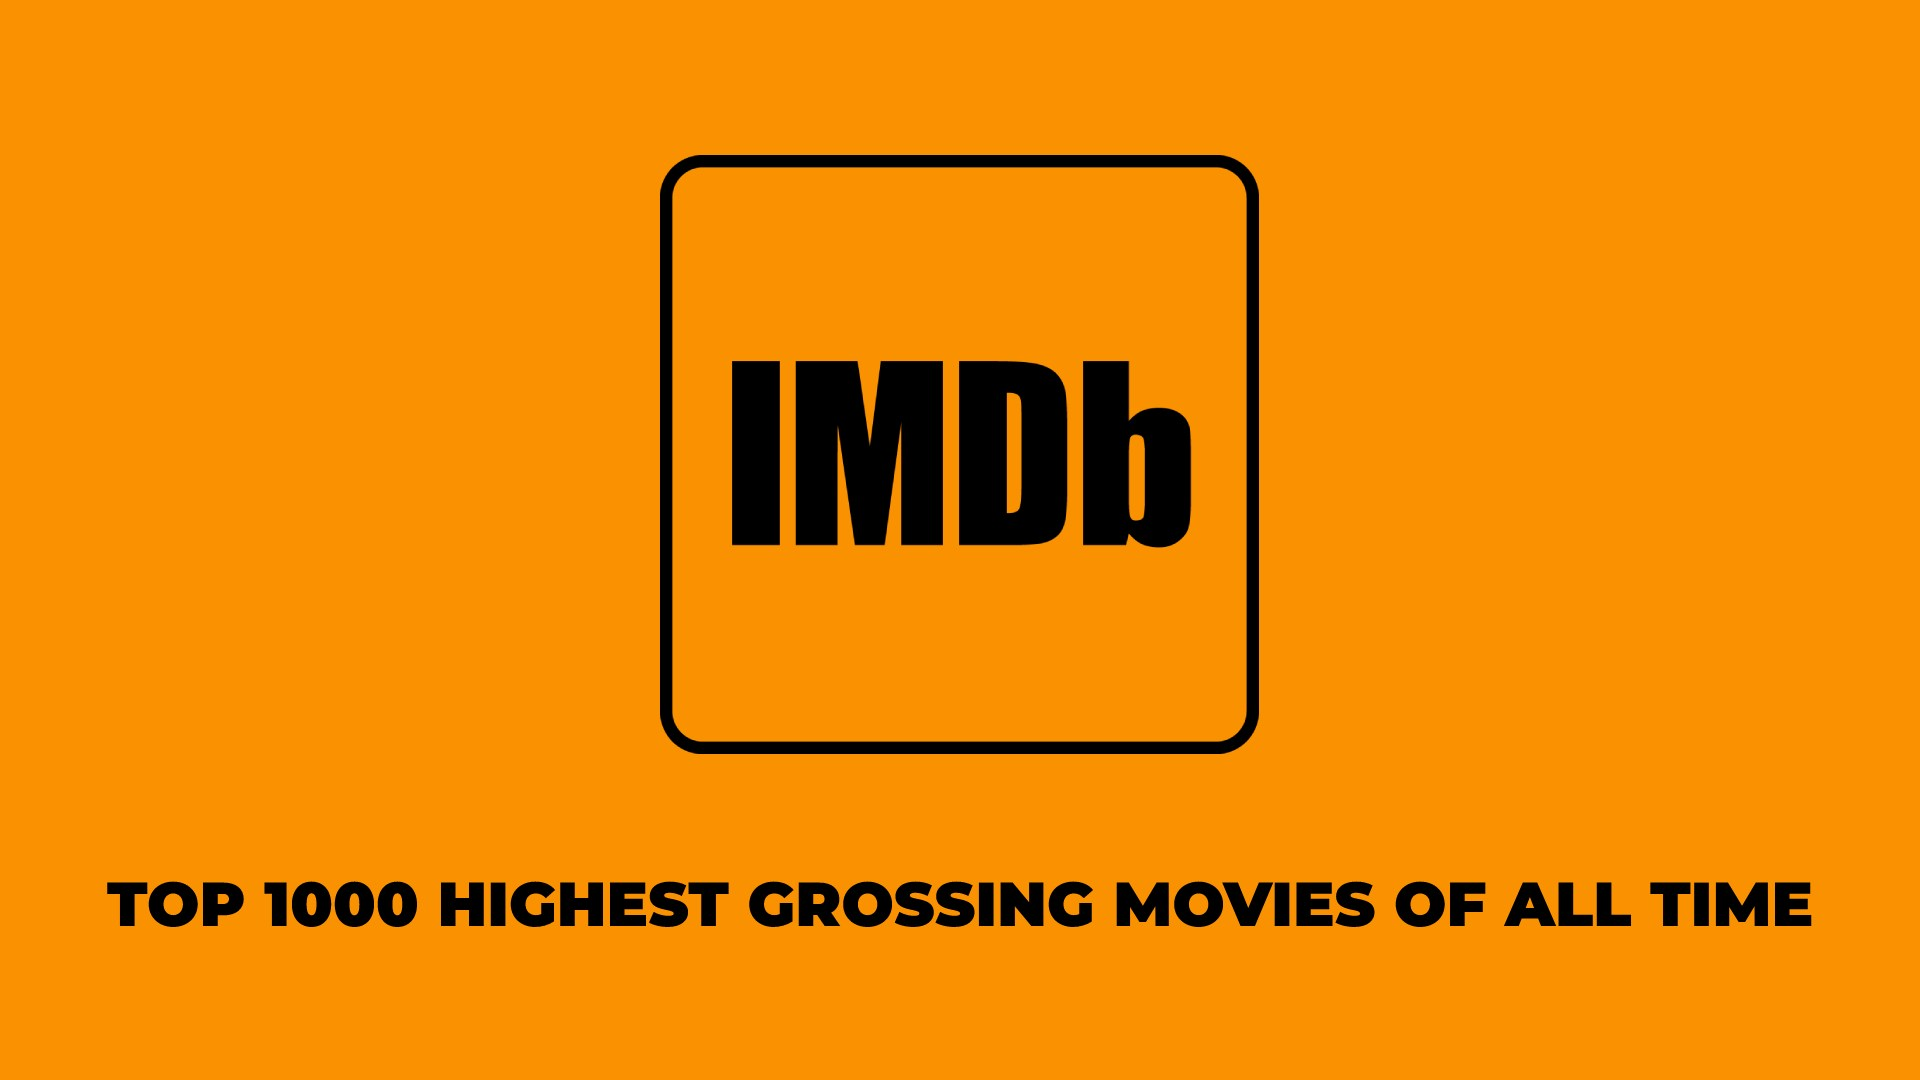

In this project, I scraped **[IMDb](https://www.imdb.com/list/ls098063263/)** website to extract **[The Top 1000 Highest Grossing Movies of All Time](https://www.kaggle.com/datasets/therealoise/top-1000-highest-grossing-movies-of-all-time)**. 

The Dataset displays only the top 1000 highest grossing feature films of all time as of `September 5, 2022`.  It is in the same order as displayed on the Box Office Mojo website. **[SOURCE](https://www.imdb.com/list/ls098063263/)**.

**DATA DICTIONARY:**<br>
`Movie Title`: The name of the movie.<br>
`Year of Release`: The year the movie was released.<br>
`Genre`: Categories where the movie belongs.<br>
`Movie Rating`: Ratings given by IMDb registered users (on a scale of 1 to 10)<br>
`Duration`: Movie running time in minutes.<br>
`Gross`: Gross earnings in U.S. dollars.<br>
`Worldwide LT Gross`: Worldwide Lifetime Gross (International + Domestic totals.<br>
`Metascore`: Weighted average of many reviews coming from reputed critics (on a scale of 0 to 100)<br>
`Votes`: Number of votes cast by IMDb registered users.<br>
`Logline`: A one or two sentence summary of the film.

In [1]:
# Import libraries and dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
# Get the URL of the Data
url = 'https://www.imdb.com/list/ls098063263/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
# Create empty lists to store the data
movie_name = []
year = []
genre = []
rating = []
duration = []
gross = []
worldwide_lt_gross = []
metascore = []
votes = []
logline = []

In [4]:
# Get the table row element
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-detail'})

In [5]:
# Extract data and append to the empty lists
for store in movie_data:
    
    name = store.h3.a.text
    movie_name.append(name)
    
    release_year = store.h3.find('span', class_ ='lister-item-year text-muted unbold').text.replace('(', '').replace(')','').replace('I', '').replace(' ','')
    year.append(release_year)
    
    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min','')
    duration.append(runtime)
    
    genre_type = store.p.find('span', class_ = 'genre').text.replace('\n', '').replace(' ', '')
    genre.append(genre_type)
    
    rate = store.find('div', class_='ipl-rating-star').text.replace('\n', '')
    rating.append(rate)
    
    meta = store.find('span', class_='metascore').text.replace(' ', '') if store.find('span', class_='metascore') else '******'
    metascore.append(meta)
    
    gross_total = store.find_all('span', attrs= {'name': 'nv'})
    
    vote = gross_total[0].text
    votes.append(vote)
    
    gross_n = gross_total[1].text if len(gross_total) >1 else '******'
    gross.append(gross_n)
    
    lifetime_gross = store.find('div', class_= 'list-description').text.replace('Worldwide Lifetime Gross: ', '') if store.find('div', class_='list-description') else '******'
    worldwide_lt_gross.append(lifetime_gross)
    
    summary = store.find('p', class_ = '').text.replace('\n', '')
    logline.append(summary)

In [6]:
movie_DF = pd.DataFrame({
    'Movie Title': movie_name, 
    'Year of Realease': year,
    'Genre': genre,
    'Movie Rating': rating,
    'Duration': duration,
    'Gross': gross,
    'Worldwide LT Gross': worldwide_lt_gross,
    'Metascore': metascore,
    'Votes': votes,
    'Logline': logline
})

In [7]:
movie_DF

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,237,072",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,688",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,167",A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,576","As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,561",The Avengers and their allies must be willing ...
...,...,...,...,...,...,...,...,...,...,...
95,Harry Potter and the Prisoner of Azkaban,2004,"Adventure,Family,Fantasy",7.9,142,$249.36M,"$797,568,607",82,"628,550","Harry Potter, Ron and Hermione return to Hogwa..."
96,Pirates of the Caribbean: Dead Men Tell No Tales,2017,"Action,Adventure,Fantasy",6.5,129,$172.56M,"$794,881,442",39,"310,302",Captain Jack Sparrow is pursued by old rival C...
97,E.T. the Extra-Terrestrial,1982,"Adventure,Family,Sci-Fi",7.9,115,$435.11M,"$792,910,554",91,"407,547",A troubled child summons the courage to help a...
98,Mission: Impossible - Fallout,2018,"Action,Adventure,Thriller",7.7,147,$220.16M,"$791,657,398",86,"331,242","Ethan Hunt and his IMF team, along with some f..."


After saving the first 100 rows, I went on to extract the remaining rows.
You can find the complete dataset here: **[Top 1000 Highest Grossing Movies Of All Time](https://www.kaggle.com/datasets/therealoise/top-1000-highest-grossing-movies-of-all-time)**.

Do leave an upvote if you find this note or dataset helpful! Thanks for reading.